In [3]:
'''>>>>> start CodeP2.4F23
    V.P. Carey ME249, Fall 2023

Intro to Neural Network Modeling 
Keras model for hybrid solar/fossil-fuel gas turbine power system'''

#import useful packages
import keras
import pandas as pd
from keras.models import Sequential
import numpy as np
import keras.backend as kb
import tensorflow as tf
#the follwoing 2 lines are only needed for Mac OS machines
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

#create input data array



## Task 2.1 (i) & (ii)

In [11]:
xdata = []
xdata =  [[ 318.0 , 0.0 , 500.0 ], [ 318.0 , 0.0 , 1000.0 ]]
xdata.append([ 318.0 , 0.0 , 1500.0 ])
xdata.append([ 318.0 , 0.0 , 2000.0 ])
xdata.append([ 318.0 , 0.0 , 2500.0 ])
xdata.append([ 318.0 , 0.25 , 500.0 ])
xdata.append([ 318.0 , 0.25 , 1000.0 ])
xdata.append([ 318.0 , 0.25 , 1500.0 ])
xdata.append([ 318.0 , 0.25 , 2000.0 ])
xdata.append([ 318.0 , 0.25 , 2500.0 ])
xdata.append([ 318.0 , 0.5 , 500.0 ])
xdata.append([ 318.0 , 0.5 , 1000.0 ])
xdata.append([ 318.0 , 0.5 , 1500.0 ])
xdata.append([ 318.0 , 0.5 , 2000.0 ])
xdata.append([ 318.0 , 0.5 , 2500.0 ])
  
xdata.append([ 303.0 , 0.0 , 500.0 ])
xdata.append([ 303.0 , 0.0 , 1000.0 ])
xdata.append([ 303.0 , 0.0 , 1500.0 ])
xdata.append([ 303.0 , 0.0 , 2000.0 ])
xdata.append([ 303.0 , 0.0 , 2500.0 ])
xdata.append([ 303.0 , 0.25 , 500.0 ])
xdata.append([ 303.0 , 0.25 , 1000.0 ])
xdata.append([ 303.0 , 0.25 , 1500.0 ])
xdata.append([ 303.0 , 0.25 , 2000.0 ])
xdata.append([ 303.0 , 0.25 , 2500.0 ])
xdata.append([ 303.0 , 0.5 , 500.0 ])
xdata.append([ 303.0 , 0.5 , 1000.0 ])
xdata.append([ 303.0 , 0.5 , 1500.0 ])
xdata.append([ 303.0 , 0.5 , 2000.0 ])
xdata.append([ 303.0 , 0.5 , 2500.0 ])
  
xdata.append([ 288.0 , 0.0 , 500.0 ])
xdata.append([ 288.0 , 0.0 , 1000.0 ])
xdata.append([ 288.0 , 0.0 , 1500.0 ])
xdata.append([ 288.0 , 0.0 , 2000.0 ])
xdata.append([ 288.0 , 0.0 , 2500.0 ])
xdata.append([ 288.0 , 0.25 , 500.0 ])
xdata.append([ 288.0 , 0.25 , 1000.0 ])
xdata.append([ 288.0 , 0.25 , 1500.0 ])
xdata.append([ 288.0 , 0.25 , 2000.0 ])
xdata.append([ 288.0 , 0.25 , 2500.0 ])
xdata.append([ 288.0 , 0.5 , 500.0 ])
xdata.append([ 288.0 , 0.5 , 1000.0 ])
xdata.append([ 288.0 , 0.5 , 1500.0 ])
xdata.append([ 288.0 , 0.5 , 2000.0 ])
xdata.append([ 288.0 , 0.5 , 2500.0 ])
  
xdata.append([ 268.0 , 0.0 , 500.0 ])
xdata.append([ 268.0 , 0.0 , 1000.0 ])
xdata.append([ 268.0 , 0.0 , 1500.0 ])
xdata.append([ 268.0 , 0.0 , 2000.0 ])
xdata.append([ 268.0 , 0.0 , 2500.0 ])
xdata.append([ 268.0 , 0.25 , 500.0 ])
xdata.append([ 268.0 , 0.25 , 1000.0 ])
xdata.append([ 268.0 , 0.25 , 1500.0 ])
xdata.append([ 268.0 , 0.25 , 2000.0 ])
xdata.append([ 268.0 , 0.25 , 2500.0 ])
xdata.append([ 268.0 , 0.5 , 500.0 ])
xdata.append([ 268.0 , 0.5 , 1000.0 ])
xdata.append([ 268.0 , 0.5 , 1500.0 ])
xdata.append([ 268.0 , 0.5 , 2000.0 ])
xdata.append([ 268.0 , 0.5 , 2500.0 ])

xdata_df = pd.DataFrame(xdata, columns = ["Temperature", "Fuel_propane_mole_frac", "Solar_heat_rate"])

#convert to:
# meadian values of input variables
xdata_df
Tmed = xdata_df["Temperature"].median()
gamed = xdata_df["Fuel_propane_mole_frac"].median()
qsmed = xdata_df["Solar_heat_rate"].median()
print(f"Median Temperature = {Tmed} \nMedian Fuel propane mole fraction = {gamed} \nMedian Solar heat rate = {qsmed}")

#T1(K), gamma, , qsol(kW):

Median Temperature = 295.5 
Median Fuel propane mole fraction = 0.25 
Median Solar heat rate = 1500.0


In [23]:
xdata_normalised_df = xdata_df / xdata_df.median()
ND = 60 #what is this for?? why is it here????

'''
    xarray stores a numpy array of the normalised xdata 
'''
xarray = xdata_normalised_df.values
# display(xdata_normalised_df)
# display(xarray)

In [14]:
ydata =  [[ 35.1316 , 0.3808 ],[ 40.3764 , 0.38686 ]]
ydata.append([ 47.4620 , 0.3930 ])
ydata.append([ 57.5639 , 0.39949 ])
ydata.append([ 73.1286 , 0.40612 ])
ydata.append([ 49.1110 , 0.4023 ])
ydata.append([ 56.4428 , 0.40605 ])
ydata.append([ 66.3479 , 0.4098 ])
ydata.append([ 80.4695 , 0.413 ])
ydata.append([ 102.2276 , 0.4175 ])
ydata.append([ 63.0904 , 0.41540 ])
ydata.append([ 72.5092 , 0.4175 ])
ydata.append([ 85.2338, 0.4197 ])
ydata.append([ 103.3750 , 0.42192 ])
ydata.append([ 131.3266 , 0.4242 ])
  
ydata.append([ 34.273 , 0.3952 ])
ydata.append([ 38.99026 , 0.4012 ])
ydata.append([ 45.2133, 0.4073 ])
ydata.append([ 53.8000 , 0.4136 ])
ydata.append([ 66.4130 , 0.4201 ])
ydata.append([ 47.922 , 0.4178 ])
ydata.append([ 54.518 , 0.4215 ])
ydata.append([ 63.220 , 0.4252 ])
ydata.append([ 75.226 , 0.4290 ])
ydata.append([ 92.862 , 0.4329 ])
ydata.append([ 61.572 , 0.4315 ])
ydata.append([ 70.0468 , 0.43373 ])
ydata.append([ 81.226 , 0.43597 ])
ydata.append([ 96.653 , 0.4382 ])
ydata.append([ 119.3124 , 0.44045 ])
  
ydata.append([ 33.4521 , 0.40913 ])
ydata.append([ 37.6911, 0.4150 ])
ydata.append([ 43.1602 , 0.4209 ])
ydata.append([ 50.4858 , 0.4271 ])
ydata.append([ 60.8067 , 0.4334 ])
ydata.append([ 46.7865 , 0.4328 ])
ydata.append([ 52.7151 , 0.43646 ])
ydata.append([ 60.36425 , 0.44016 ])
ydata.append([ 70.6099 , 0.443926 ])
ydata.append([ 85.0447 , 0.4477 ])
ydata.append([ 60.1208 , 0.44721 ])
ydata.append([ 67.7391 , 0.44940 ])
ydata.append([ 77.56830 , 0.4516 ])
ydata.append([ 90.73410 , 0.4538 ])
ydata.append([ 109.2828 , 0.4560 ])
  
ydata.append([ 32.4123 , 0.42694 ])
ydata.append([ 36.0807 , 0.4325 ])
ydata.append([ 40.6854 , 0.4383 ])
ydata.append([ 46.6374 , 0.4442 ])
ydata.append([ 54.6293 , 0.4503 ])
ydata.append([ 45.3472 , 0.4519 ])
ydata.append([ 50.4796 , 0.4555 ])
ydata.append([ 56.9219 , 0.4591 ])
ydata.append([ 65.2492 , 0.4628 ])
ydata.append([ 76.4304 , 0.4665 ])
ydata.append([ 58.2822 , 0.4672 ])
ydata.append([ 64.8785 , 0.4693 ])
ydata.append([ 73.1584 , 0.4715 ])
ydata.append([ 83.8610 , 0.4738 ])
ydata.append([ 98.2316 , 0.4760 ])

#convert to:
# meadian values of output variables
ydata_df = pd.DataFrame(ydata, columns = ["Air_fuel_ratio", "System_efficiency"])

almed = ydata_df["Air_fuel_ratio"].median()
efmed = ydata_df["System_efficiency"].median()
print(f"Median air fuel ratio = {almed} \nMedian system efficiency = {efmed}")
# alpha, effsys



Median air fuel ratio = 61.189350000000005 
Median system efficiency = 0.432


In [25]:
ydata_normalised_df = ydata_df / ydata_df.median()
'''
    yarray stores a numpy array of the normalised xdata 
'''
yarray = ydata_normalised_df.values

# display(ydata_normalised_df)
# display(yarray)

### Normalized xdata and ydata dataframes

In [29]:
display(xdata_normalised_df)
display(ydata_normalised_df)

,Temperature,Fuel_propane_mole_frac,Solar_heat_rate
0,1.076142,0.0,0.333333
1,1.076142,0.0,0.666667
2,1.076142,0.0,1.000000
3,1.076142,0.0,1.333333
4,1.076142,0.0,1.666667
5,1.076142,1.0,0.333333
6,1.076142,1.0,0.666667
7,1.076142,1.0,1.000000
8,1.076142,1.0,1.333333
9,1.076142,1.0,1.666667


,Air_fuel_ratio,System_efficiency
0,0.574146,0.881481
1,0.659860,0.895509
2,0.775658,0.909722
3,0.940750,0.924745
4,1.195120,0.940093
5,0.802607,0.931250
6,0.922428,0.939931
7,1.084305,0.948611
8,1.315090,0.956019
9,1.670676,0.966435


## Task 2.2

### Assigning data inputs and data outputs

In [36]:
data_inputs = xarray
data_outputs = yarray

In [43]:
data_outputs

array([[0.57414566, 0.88148148],
       [0.65985993, 0.89550926],
       [0.77565786, 0.90972222],
       [0.94075031, 0.92474537],
       [1.19511974, 0.94009259],
       [0.80260699, 0.93125   ],
       [0.92242849, 0.93993056],
       [1.0843047 , 0.94861111],
       [1.31508996, 0.95601852],
       [1.67067635, 0.96643519],
       [1.03106831, 0.96157407],
       [1.18499706, 0.96643519],
       [1.39295155, 0.97152778],
       [1.68942798, 0.97666667],
       [2.14623296, 0.98194444],
       [0.56011381, 0.91481481],
       [0.63720664, 0.9287037 ],
       [0.738908  , 0.94282407],
       [0.87923797, 0.95740741],
       [1.08536861, 0.9724537 ],
       [0.7831755 , 0.96712963],
       [0.89097204, 0.97569444],
       [1.03318633, 0.98425926],
       [1.22939695, 0.99305556],
       [1.51761704, 1.00208333],
       [1.00625354, 0.99884259],
       [1.14475477, 1.00400463],
       [1.32745323, 1.00918981],
       [1.57957226, 1.01435185],
       [1.94988834, 1.01956019],
       [0.

## Cell 2

In [37]:
# define neural network model

#As seen below, we have created four dense layers. 
#A dense layer is a layer in neural network that’s fully connected. 
#In other words, all the neurons in one layer are connected to all other neurons in the next layer.
#In the first layer, we need to provide the input shape, which is 1 in our case. 
#The activation function we have chosen is elu, which stands for exponential linear unit. .

from keras import backend as K
#initialize weights with values between -0.2 and 1.2
initializer = keras.initializers.RandomUniform(minval= -0.9, maxval=0.9)

model = keras.Sequential([
    keras.layers.Dense(4, activation=K.elu, input_shape=[3],  kernel_initializer=initializer),
    keras.layers.Dense(8, activation=K.elu,  kernel_initializer=initializer),
    keras.layers.Dense(4, activation=K.elu, kernel_initializer=initializer),
    keras.layers.Dense(2,  kernel_initializer=initializer)
  ])
'''in Task 2.2, add 3rd layer to network with 4 neurons and activation = K.relu'''
#Print summary of model features
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 4)                 16        
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_17 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_18 (Dense)             (None, 2)                 10        
Total params: 102
Trainable params: 102
Non-trainable params: 0
_________________________________________________________________


## Cell 3

In [38]:
#We’re using RMSprop as our optimizer here. RMSprop stands for Root Mean Square Propagation. 
#It’s one of the most popular gradient descent optimization algorithms for deep learning networks. 
#RMSprop is an optimizer that’s reliable and fast.
#We’re compiling the mode using the model.compile function. The loss function used here 
#is mean squared error. After the compilation of the model, we’ll use the fit method with ~500 epochs.
#Number of epochs can be varied.

#from tf.keras import optimizers. Argument to RMSprop is learning parameter.
rms = keras.optimizers.RMSprop(0.001)
model.compile(loss='mean_absolute_error',optimizer=rms)


## Cell 4

In [39]:
#After the compilation of the model, we’ll use the fit method with 500 epochs.
#I started with epochs value of 100 and then tested the model after training. 
#The prediction was not that good. Then I modified the number of epochs to 200 and tested the model again. 
#Accuracy had improved slightly, but figured I’d give it one more try. Finally, at 500 epochs 
#I found acceptable prediction accuracy.

#The fit method takes three parameters; namely, x, y, and number of epochs. 
#During model training, if all the batches of data are seen by the model once, 
#we say that one epoch has been completed.

# Add an early stopping callback
for i in range(4):
    es = keras.callbacks.EarlyStopping(
        monitor='loss', 
        mode='min', 
        patience = 80, 
        restore_best_weights = True, 
        verbose=1)
    # Add a checkpoint where loss is minimum, and save that model
    mc = keras.callbacks.ModelCheckpoint('best_model.SB', monitor='loss', 
                        mode='min',  verbose=1, save_best_only=True)

    historyData = model.fit(xarray,yarray,epochs=600,callbacks=[es])

    loss_hist = historyData.history['loss']
    #The above line will return a dictionary, access it's info like this:
    best_epoch = np.argmin(historyData.history['loss']) + 1
    print ('best epoch = ', best_epoch)
    print('smallest loss =', np.min(loss_hist))

    predictions = model.predict(data_inputs)


Epoch 1/600
60/60 [==============================] - 0s 7ms/step - loss: 1.8176
Epoch 2/600
60/60 [==============================] - 0s 119us/step - loss: 1.7460
Epoch 3/600
60/60 [==============================] - 0s 65us/step - loss: 1.6968
Epoch 4/600
60/60 [==============================] - 0s 69us/step - loss: 1.6559
Epoch 5/600
60/60 [==============================] - 0s 71us/step - loss: 1.6193
Epoch 6/600
60/60 [==============================] - 0s 79us/step - loss: 1.5855
Epoch 7/600
60/60 [==============================] - 0s 74us/step - loss: 1.5538
Epoch 8/600
60/60 [==============================] - 0s 167us/step - loss: 1.5235
Epoch 9/600
60/60 [==============================] - 0s 92us/step - loss: 1.4944
Epoch 10/600
60/60 [==============================] - 0s 96us/step - loss: 1.4666
Epoch 11/600
60/60 [==============================] - 0s 116us/step - loss: 1.4399
Epoch 12/600
60/60 [==============================] - 0s 115us/step - loss: 1.4141
Epoch 13/600
60/60 [==

### Lowest loss value achieved with 4 runs
Smallest loss = 0.03676786832511425

## Cell 5


row [0] data:  T1=  317.99999999999994 , gam=  0.0 , qsol=  500.0 , alpha=  35.1316 ,  predicted alpha =  33.70670258867741


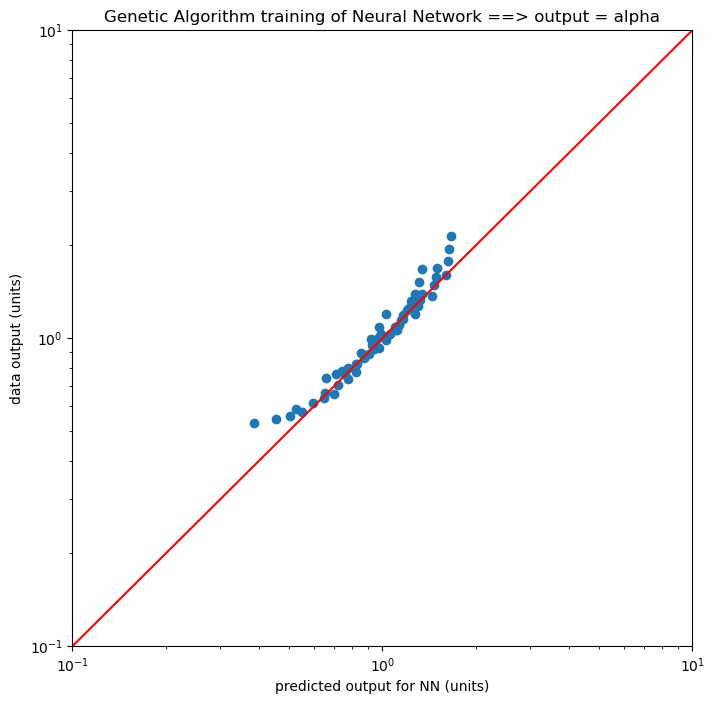

In [44]:
test = []
outpt=[]
predictions = model.predict(data_inputs)

#first point (row [0])comparison of data and prediction
# put in a loop to print comparion for all data points

test = [[ xarray[0][0] , xarray[0][1] , xarray[0][2] ]]
testarray = np.array(test)
outpt = model.predict(testarray)

print ('row [0] data:  T1= ', xarray[0][0]*Tmed, ', gam= ', xarray[0][1]*gamed, \
    ', qsol= ', xarray[0][2]*qsmed,', alpha= ', yarray[0][0]*almed,\
    ',  predicted alpha = ', outpt[0][0]*almed)

#SETTING UP PLOT
%matplotlib inline
# importing the required module
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [8, 8] # for square canvas 
#========

'''CALCULATE PREDICTED VALUES AND RETRIEVE DATA VALUES TO PLOT'''

#select all items in the data_outputs file, take the 0th index of each item. This is alpha, in this case
plt.scatter(predictions[:, 0], data_outputs[:, 0])
plt.title('Genetic Algorithm training of Neural Network ==> output = alpha')
plt.xlabel('predicted output for NN (units)') 
plt.ylabel('data output (units)')
plt.loglog()
plt.xlim(xmax = 10, xmin = 0.1)
plt.ylim(ymax = 10, ymin = 0.1)
# Generate red y=x line
x_data = np.linspace(0.1, 10.0, num=3)
y_data = x_data
plt.plot(x_data, y_data, color='red')
plt.show()




### Surface plot for alpha(T1, Qs)

In [49]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [68]:
col1 = list(range(268, 319))  # Values from 268 to 318
col2 = [0.25] * len(col1)  # Constant value of 0.25 for the same length as col1
col3 = list(range(500, 2501, 40))  # Values from 500 to 2500

data = pd.DataFrame({
    'Column1': col1,
    'Column2': col2,
    'Column3': col3
})

data[:5]
len(data.values)

predictions = model.predict(data.values)
predictions_df = pd.DataFrame(predictions, columns = ["Air_fuel_ratio", "System_efficiency"])
predictions_df


,Air_fuel_ratio,System_efficiency
0,17.827301,18.855412
1,18.030174,19.122265
2,18.232941,19.389050
3,18.435602,19.655766
4,18.638163,19.922411
5,18.840624,20.188993
6,19.043001,20.455532
7,19.247097,20.724279
8,19.641245,21.232897
9,21.066132,23.079762


In [93]:
t_values = np.linspace(268, 318, 50)
q_values = np.linspace(500, 2500, 50)
T, Q = np.meshgrid(t_values, q_values)
g_values = np.full(T.shape, 0.25)

input_data = np.vstack([T.ravel(), Q.ravel(), g_values.ravel()]).T


In [102]:
predictions = model.predict(input_data)

Z = predictions[:, 0].reshape(T.shape)

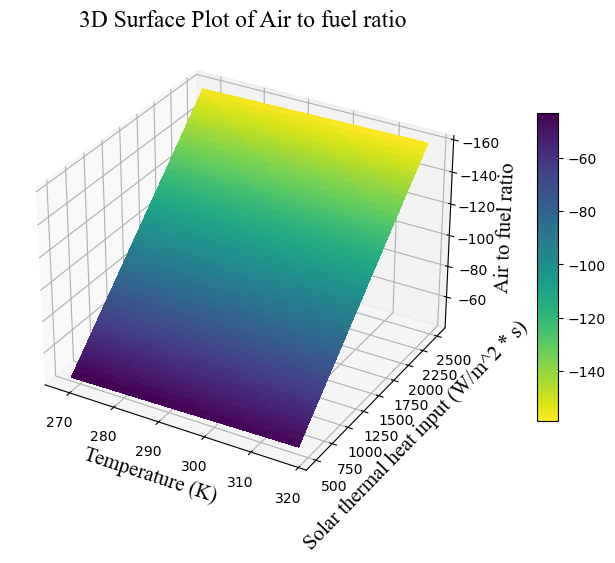

In [103]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
font_family = 'Times New Roman'
title_font_size=17
label_font_size=15

# Create a surface plot using the predicted values
surf = ax.plot_surface(T, Q, Z, cmap='viridis_r',linewidth=0, antialiased=False)

# Add labels and title
ax.set_xlabel('Temperature (K)', fontsize=label_font_size, fontfamily=font_family)
ax.set_ylabel('Solar thermal heat input (W/m^2 * s)', fontsize=label_font_size, fontfamily=font_family)
ax.set_zlabel('Air to fuel ratio', fontsize=label_font_size, fontfamily=font_family)
ax.set_title('3D Surface Plot of Air to fuel ratio', fontsize=title_font_size, fontfamily=font_family)

ax.invert_zaxis()
# Add a color bar for reference
fig.colorbar(surf, shrink=0.5, aspect=15, pad=0.1)

# Show the plot
plt.show()


### Observations

As the solar thermal heat input increases, the air to fuel ratio increases. This is expected since the exit temperature will have to be lowered with a greater solar thermal energy input

## Task 2.3
